In [187]:
import numpy as np
import pandas as pd
import warnings
from matplotlib import pyplot as plt
warnings.filterwarnings('ignore')

In [43]:
df_sub=pd.read_pickle('subscribers')
df_cust = pd.read_pickle('customer_service_reps')
df_en = pd.read_pickle('engagement')
df_ch = pd.read_csv('Copy of channel_spend_graduate.csv')

In [44]:
df_sub.head()

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,...,creation_until_cancel_days,cancel_before_trial_end,trial_end_date,initial_credit_card_declined,revenue_net,join_fee,language,paid_TF,refund_after_trial_TF,payment_type
162502,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,False,NaN,False,...,NaN,True,2020-02-08,False,NaN,NaN,ar,True,False,Standard Charter
380374,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,False,70.0,False,...,0.0,False,2020-03-16,False,0.0,0.3303,ar,False,False,NaN
496617,26844789,enhanced,3.362885,regional,replace OTT,36.001186,1.951776,False,25.0,True,...,1.0,False,2019-12-22,False,0.0,0.1101,ar,False,False,NaN
356799,29417030,base,NaN,drama,replace OTT,20.051667,NaN,False,30.0,False,...,0.0,False,2020-02-11,False,0.0,0.0367,ar,False,False,NaN
681701,26723159,base,3.731089,comedy,replace OTT,22.951579,2.506384,False,28.0,False,...,9.0,False,2019-10-20,False,0.0,0.0367,ar,False,False,NaN


In [45]:
df_cust.head()

,customer_service_rep_id,subid,current_sub_TF,cancel_date,account_creation_date,num_trial_days,trial_completed_TF,billing_channel,revenue_net_1month,payment_period,last_payment,next_payment,renew
4,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,0,2019-11-26 03:30:29,2019-11-26 03:30:29,NaN
5,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,1,2019-11-26 03:30:29,2019-12-27 03:30:29,NaN
6,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,2,2019-12-27 03:30:29,2020-01-26 03:30:29,NaN
7,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,3,2020-01-26 03:30:29,NaT,NaN
8,31174901,25914865,True,NaT,2020-03-19 01:20:25,14,True,itunes,1.1377,0,2020-03-19 01:20:25,2020-04-02 01:20:25,NaN


In [46]:
df_en.head()

,subid,date,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,payment_period
1,22349235,2019-07-01,1.0,1.0,0.0,6.0,0.0,0.0,0.0
2,22349235,2019-07-02,1.0,0.0,0.0,5.0,0.0,0.0,0.0
3,22349235,2019-07-03,0.0,1.0,0.0,0.0,0.0,0.0,0.0
50,20848497,2019-07-02,1.0,0.0,7.0,7.0,0.0,0.0,0.0
51,22680106,2019-07-02,2.0,1.0,7.0,7.0,0.0,1.0,0.0


In [47]:
df_ch.head()

,channel,date,spend_AED
0,bing,201907,400
1,display,201907,12
2,facebook,201907,9000
3,search,201907,13000
4,youtube,201907,90


# AB Test

In [48]:
df_sub['plan_type'].value_counts()

base_uae_14_day_trial                227096
high_uae_14_day_trial                   325
low_uae_no_trial                        167
base_eur_14_day_trial                    18
high_sar_14_day_trial                    12
low_gbp_14_day_trial                      4
high_aud_14_day_trial                     2
low_eur_no_trial                          1
base_uae_no_trial_7_day_guarantee         1
low_sar_no_trial                          1
high_jpy_14_day_trial                     1
Name: plan_type, dtype: int64

In [49]:
df_sub['conversion'] = False

In [58]:
df_sub['conversion'][(df_sub['paid_TF'] == True) & (df_sub['refund_after_trial_TF'] == False)] = True

In [68]:
df_sub[df_sub['conversion'] == True]['plan_type'].value_counts()

base_uae_14_day_trial                82558
low_uae_no_trial                       133
high_uae_14_day_trial                   97
base_eur_14_day_trial                    9
high_sar_14_day_trial                    4
high_aud_14_day_trial                    1
base_uae_no_trial_7_day_guarantee        1
low_gbp_14_day_trial                     1
low_sar_no_trial                         1
Name: plan_type, dtype: int64

In [166]:
base = df_sub['plan_type'].value_counts().to_frame()

In [167]:
base

,plan_type
base_uae_14_day_trial,227096
high_uae_14_day_trial,325
low_uae_no_trial,167
base_eur_14_day_trial,18
high_sar_14_day_trial,12
low_gbp_14_day_trial,4
high_aud_14_day_trial,2
low_eur_no_trial,1
base_uae_no_trial_7_day_guarantee,1
low_sar_no_trial,1


In [148]:
conversion = df_sub[df_sub['conversion'] == True]['plan_type'].value_counts().to_frame()

In [149]:
conversion

,plan_type
base_uae_14_day_trial,82558
low_uae_no_trial,133
high_uae_14_day_trial,97
base_eur_14_day_trial,9
high_sar_14_day_trial,4
high_aud_14_day_trial,1
base_uae_no_trial_7_day_guarantee,1
low_gbp_14_day_trial,1
low_sar_no_trial,1


In [168]:
base_14trial = base.loc['base_uae_14_day_trial','plan_type']

In [169]:
base_14con = conversion.loc['base_uae_14_day_trial','plan_type']

In [171]:
prob_14trial = base_14con/base_14trial

In [185]:
print('Conversion rate for 14 days base trial is :{:.2f}'.format(prob_14trial))

Conversion rate for 14 days base trial is :0.36


In [175]:
low_notrial = base.loc[ 'low_uae_no_trial','plan_type']

In [176]:
low_nocon = conversion.loc[ 'low_uae_no_trial','plan_type']

In [177]:
prob_notrial = low_nocon/low_notrial

In [186]:
print('Conversion rate for no trial is :{:.2f}'.format(prob_notrial))

Conversion rate for no trial is :0.80


In [179]:
high_14trial = base.loc['high_uae_14_day_trial', 'plan_type' ]

In [181]:
high_14con = conversion.loc['high_uae_14_day_trial', 'plan_type' ]

In [182]:
prob_hightrial = high_14con/high_14trial

In [184]:
print('Conversion rate for high trial is :{:.2f}'.format(prob_hightrial))

Conversion rate for high trial is :0.30


In [120]:
z_no = (prob_notrial - prob_14trial)/np.sqrt((prob_14trial)*(1-prob_14trial)*(1/base_14trial + 1/low_notrial))

In [121]:
z_no

11.62503521676383

In [122]:
z_high = (prob_hightrial - prob_14trial)/np.sqrt((prob_14trial)*(1-prob_14trial)*(1/base_14trial + 1/high_14trial))

In [123]:
z_high

-2.4372113944687612

# Attribution and Allocation

In [124]:
df_channel = pd.read_csv('Copy of channel_spend_graduate.csv')

In [126]:
spend = df_channel.groupby('channel').sum('spend_AED')

In [132]:
spend = spend.drop('date', axis = 1)

In [133]:
spend

,spend_AED
channel,
bing,10800
display,366
facebook,113500
search,222500
youtube,8730


In [139]:
attribution = df_sub['attribution_technical'].value_counts().to_frame()

In [142]:
attribution = attribution.reset_index()
attribution.columns = ['channel','num_user']

In [144]:
attribution = pd.merge(attribution, spend, on = ['channel'])

In [146]:
attribution['avg_CAC'] = attribution['spend_AED']/attribution['num_user']

In [147]:
attribution

,channel,num_user,spend_AED,avg_CAC
0,facebook,80251,113500,1.414313
1,search,25306,222500,8.792381
2,display,1407,366,0.260128
3,bing,1146,10800,9.424084
4,youtube,913,8730,9.561884


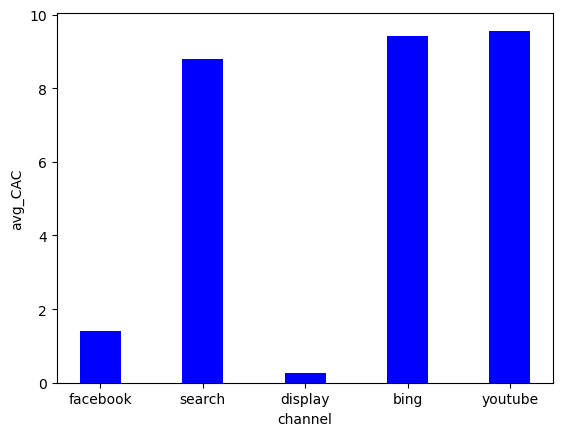

In [192]:
plt.bar(attribution['channel'], attribution['avg_CAC'], color ='blue', width = 0.4)
plt.xlabel("channel")
plt.ylabel("avg_CAC")
plt.show()